Mounted at /content/gdrive
Result of edge detection is saved as gdrive/My Drive/ComputerVisionA/Images/ura_DetectedEdges.png
Image with detected lines is saved as gdrive/My Drive/ComputerVisionA/Images/ura_LinesByHough.png


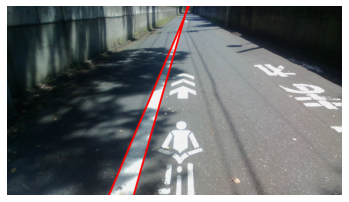

In [1]:
"""
Skelton file for line detection with Hough transformation
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt

#Google setting
from google import colab
colab.drive.mount('/content/gdrive')

#Directory setting
b_dir='gdrive/My Drive/ComputerVisionA/' # Setting working directory
t_dir=b_dir+'Images/'



#Parameter setting for Hough transformation
r_rho=1
r_theta=np.pi/180
threshold=250


#File name setting
trg='ura'
ext='.png'
name=t_dir+trg+ext

e_name=t_dir+trg+'_DetectedEdges'+ext
o_name=t_dir+trg+'_LinesByHough'+ext
#o_name=t_dir+trg+'_LinesByHough'+str(threshold)+ext


#Read the input image 

# img = #***Describe by yourself****# 
img = cv2.imread(name)

#Convert the input image to the gray scale image

# gray = #***Describe by yourself****#
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


#Detect edge

# edges = #***Describe by yourself****#
edges = cv2.Canny(gray, 100, 150)


#Hough transformation (Change the parameters set above)

lines = cv2.HoughLines(edges,r_rho,r_theta,threshold)


#Draw the detected lines

if lines is None:
    print('\n*********************')
    print('No line is detected')
    print('*********************')

else:
    for  i in range(lines.shape[0]):
        rho=lines[i,0,0]
        theta=lines[i,0,1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        
        if(np.abs(b)<0.000001): # 水平線
            x1 = x0
            y1 = 0
            x2 = x0
            y2 = img.shape[0]-1
        elif(np.abs(a)<0.000001) :# 垂直線
            x1 = 0
            y1 = y0
            x2 = img.shape[1]-1
            y2 = y0
        else:
            if(x0>0 and y0>0):
                x1=0
                y1 = int(y0 + a/b*x0)
                x2 = int(x0 + b/a*y0)
                y2 = 0
            elif(x0>0 and y0<0):
                x1=img.shape[1]-1
                y1 = int(y0 + a/b*x0-a/b*x1)

                x2 = int(x0 + b/a*y0)
                y2 = 0
            elif(x0<0 and y0>0):
                x1=0
                y1 = int(y0 + a/b*x0)
                
                y2=img.shape[0]-1
                x2 = int(x0 + b/a*y0-b/a*y2)
                               
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),5)


#Save the images with detected lines
    cv2.imwrite(e_name,edges)
    print('Result of edge detection is saved as '+e_name)
    cv2.imwrite(o_name,img)
    print('Image with detected lines is saved as '+o_name)


#Color transformation for display using matplotlib
    pimg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(pimg)
    plt.axis('off')